# <font color='navy'>Mac vs. Windows</font>
_____________________________________________________
# <font color='navy'>Introduction</font>

## <font color='steelblue'>Challenge Description </font>


The purpose of this analysis is to find  key research-backed insights on consumer buying behavior between Windows and Macbooks.

## <font color='steelblue'>Importing Libraries </font>

In [2]:
########################################
# importing packages
########################################
import numpy             as np                                 # mathematical essentials
import pandas            as pd                                 # data science essentials
import matplotlib.pyplot as plt                                # fundamental data visualization
import seaborn           as sns                                # enhanced visualization
import math 
from sklearn.preprocessing     import StandardScaler           # standard scaler
from sklearn.decomposition     import PCA                      # pca
from   scipy.cluster.hierarchy import dendrogram, linkage      # dendrograms
from   sklearn.cluster         import KMeans                   # k-means clustering



########################################
# loading data and setting display options
########################################
# loading data
survey = pd.read_excel('survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

## <font color='steelblue'>Data Overview</font>

In [3]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {survey.shape[0]}
Features:     {survey.shape[1]}
""")
# observations = rows 
# features = columns = variables


Size of Original Dataset
------------------------
Observations: 137
Features:     79



The data is made up of the responses of 137 Hult Business School students to 79 survey questions designed to reveal their personality types according to the Big Five personality traits and the Hult DNA.

**Big Five Personality Traits**
1. Openness 
2. Conscientiousness 
3. Extraversion  
4. Agreeableness  
5. Neuroticism 


**Hult DNA**
1. Thinking
2. Communicating
3. Team Building 

## <font color='steelblue'>User-defined Functions</font>

In [4]:
# defining pca_plotter

########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    
########################################
# tsne_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# tsne_plotter
def tsne_plotter(bunch,
                 colors  = None,
                 x_label = "t-SNE feature 0",
                 y_label = "t-SNE feature 1"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in TSNE
colors       : color coding for target labels, default None
x_label      : x-label for t-SNE feature 0, default "t-SNE feature 0"
y_label      : y-label for t-SNE feature 1, default "t-SNE feature 1"
"""
    
    # INSTANTIATING a PCA object
    tsne = TSNE(random_state = 219)

    
    # FITTING and TRANSFORMING the data
    dataset_tsne = tsne.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_tsne[:, 0].min(), dataset_tsne[:, 0].max() + 1)
    plt.ylim(dataset_tsne[:, 1].min(), dataset_tsne[:, 1].max() + 1)

    
    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_tsne[i, 0],
                 dataset_tsne[i, 1],
                 str(bunch.target[i]),
                 color    = colors[bunch.target[i]],
                 fontdict = {'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

In [5]:
# loading scree-plot and intertia plot 

########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/scree_plot_1.png')
        
    # displaying the plot
    plt.show()
    
    
    
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


In [6]:
# defining function to automaticalluy plot distributions for all given columns of a dataset

########################################
# auto-distribution plot
########################################


def auto_distribution(
        data,  list_cols, color = None):
    """
This function is desiged to plot distributions automatically for all given columns
of a dataset.
    
PARAMETERS
----------
data      : DataFrame, data from which to plot distributions
list_cols : list of columns to plot the distributions of
color     : OPTIONAL: default 'b'. Choose colour of distribution"""
    
    
    fig, axes = plt.subplots(math.ceil(len(list_cols)/2), 2,figsize = (15, math.ceil(len(list_cols)/2)*5+5))
    current_plot = 1
    fig.suptitle('Distributions', fontsize=25)
    
    for explanatory in list_cols:
        
        plt.subplot(math.ceil(len(list_cols)/2), 2, current_plot)
        ax = sns.histplot(x    = explanatory,
                    data = data)
        current_plot = current_plot + 1
    plt.show()

# <font color='navy'>Data Preparation</font>

## <font color='steelblue'>Cleanup</font>

We cleaned the data to make the analysis more feasible.

In [7]:
##########################
# fixing nationality column
##########################
for x,y in survey.iloc[:, 77].iteritems():
    survey.iloc[x,77] = survey.iloc[x,77].lower()
    

for x,y in survey.iloc[:,77].iteritems():
    if y == 'brazil':
        survey.iloc[x,77] = 'brazilian'
    if y == 'british, indian':
        survey.iloc[x,77] = 'british'
    if y == 'canada':
        survey.iloc[x,77] = 'canadian'
    if y == 'china':
        survey.iloc[x,77] = 'chinese'
    if y == 'colombia':
        survey.iloc[x,77] = 'colombian'
    if y == 'congolese (dr congo)':
        survey.iloc[x,77] = 'congolese'
    if y == 'czech republic':
        survey.iloc[x,77] = 'czech'
    if y == 'dominican ':
        survey.iloc[x,77] = 'dominican'
    if y == 'indian.':
        survey.iloc[x,77] = 'indian'
    if y == 'indonesia':
        survey.iloc[x,77] = 'indonesian'
    if y == 'italian and spanish':
        survey.iloc[x,77] = 'italian' # because why not
    if y == 'nigeria':
        survey.iloc[x,77] = 'nigerian'
    if y == 'korea' or y == 'republic of korea' or y == 'south korea':
        survey.iloc[x,77] = 'korean'
    if y == 'russia':
        survey.iloc[x,77] = 'russian'
    if y == 'spain':
        survey.iloc[x,77] = 'spanish'
    if y == 'usa':
        survey.iloc[x,77] = 'american'
    if y == 'germany' or y == 'german/american':
        survey.iloc[x,77] = 'american'
    if y == 'peru':
        survey.iloc[x,77] = 'peruvian'
    if y == 'ecuador':
        survey.iloc[x,77] = 'ecuadorian'
    if y == 'philippines':
        survey.iloc[x,77] = 'filipino '
        

In [52]:
# Checking null values
survey.isna().any().sum()

0

In [8]:
#####################################
# separating numeric/personal columns
#####################################


numeric_survey = survey.iloc[:,1:-7]             # Subset Numerical columns dataframe for future use
personal_details_survey = survey.iloc[:,-7:79]   # Subset Personal columns dataframe for future use



In [9]:
#############################################################
# Removing repeat columns/refutable rows and adjusting respective dataframes
#############################################################

columns_to_remove = [
    "Take initiative even when circumstances, objectives, or rules aren't clear.1",
    "Encourage direct and open discussions.1",
    "Respond effectively to multiple priorities.1"]

survey = survey.drop(columns= columns_to_remove) # removing columns
numeric_survey = numeric_survey.drop(columns = columns_to_remove)

numeric_survey = numeric_survey.drop(index= [59,110])  # dropping seemingly bogus data
survey = survey.drop(index = [59,110])

# Adjusting the index after removing the rows so it doesn;t have gaps

index = [ 0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134]

survey = survey.set_index(pd.Index(index))

## <font color='steelblue'>Grouping</font>

We assigned continents to the respective countries to condense the data further and allow for better visualization. Next, we grouped the age feature into smaller categories.

### <font color='steelblue'>Nationality and Age</font>

In [10]:
#############################################################
# Grouping Nationalities by continent for better visualisation
#############################################################

survey['continent'] = 0

for index,y in survey.iterrows():
    if survey.loc[index, 'What is your nationality? '] == 'indian':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'chinese':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'japan':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'filipino ':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'philippines':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'indonesian':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'thai':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'vietnamese':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'korean':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'taiwan':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'kyrgyz':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'turkish':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'pakistani':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'russian':
        survey.loc[index, 'continent'] = 'asia'
    if survey.loc[index, 'What is your nationality? '] == 'ecuadorian':
        survey.loc[index, 'continent'] = 'south america' 
    if survey.loc[index, 'What is your nationality? '] == 'brazilian':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'dominican':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'peruvian':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'costarrican':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'mexican':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'colombian':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'venezuelan':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'panama':
        survey.loc[index, 'continent'] = 'south america'
    if survey.loc[index, 'What is your nationality? '] == 'canadian':
        survey.loc[index, 'continent'] = 'north america'
    if survey.loc[index, 'What is your nationality? '] == 'american':
        survey.loc[index, 'continent'] = 'north america'
    if survey.loc[index, 'What is your nationality? '] == 'british':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'czech':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'italian':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'spanish':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'ukrainian':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'swiss':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'german':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'belgian ':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'portuguese':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'norwegian':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'belarus':
        survey.loc[index, 'continent'] = 'europe'
    if survey.loc[index, 'What is your nationality? '] == 'congolese':
        survey.loc[index, 'continent'] = 'africa'
    if survey.loc[index, 'What is your nationality? '] == 'nigerian':
        survey.loc[index, 'continent'] = 'africa'
    if survey.loc[index, 'What is your nationality? '] == 'ugandan':
        survey.loc[index, 'continent'] = 'africa'
    if survey.loc[index, 'What is your nationality? '] == 'mauritius':
        survey.loc[index, 'continent'] = 'africa'
    if survey.loc[index, 'What is your nationality? '] == 'kenyan':
        survey.loc[index, 'continent'] = 'africa'
    if survey.loc[index, 'What is your nationality? '] == 'ghanaian':
        survey.loc[index, 'continent'] = 'africa'
    if survey.loc[index, 'What is your nationality? '] == 'prefer not to answer':
        survey.loc[index, 'continent'] = 'unknown'

In [11]:
#############################################################
# Grouping age for better visualisation
#############################################################
        
survey["Generation"] = 0
for index,y in survey.iterrows():
    if (survey.loc[index, 'What is your age?'] >= 21 and 
            survey.loc[index, 'What is your age?'] <= 25):
            survey.loc[index, 'Generation'] = 'Gen Z'

    elif (survey.loc[index, 'What is your age?'] >= 26 and 
            survey.loc[index, 'What is your age?'] <= 40):
            survey.loc[index, 'Generation'] = 'Millennial'
    else:    
        survey.loc[index, 'Generation'] = 'Other'

### <font color='steelblue'>Big-Five</font>

In [12]:
# #####################################
# The Big-Five columns are being split into their respective categories. 
# For example, the question "Have a vivid imagination" falls into 
# the Openness category of the Big-Five. 
# Secondly, we have opposite columns that we called 'lo_'. 
# These columns ask about one of the traits but with a negative connotation. 
# For example, a lower score "Have difficulty understanding abstract ideas" 
# would translate to a high score for Openness.
# #####################################

# column numbers for high openness  
o_columns = [ 
                'Have a rich vocabulary',
                'Have a vivid imagination',
                'Have excellent ideas',
                'Am quick to understand things',
                'Use difficult words',
                'Spend time reflecting on things',
                'Am full of ideas'
] 



# column numbers for high conscientiousness  
c_columns = [ 
                'Am always prepared',
                'Pay attention to details',
                'Get chores done right away',
                'Like order',
                'Follow a schedule',
                'Am exacting in my work'
] 



# column numbers for high extraversion 
e_columns =  [
                'Am the life of the party',
                'Feel comfortable around people',
                'Start conversations',
                'Talk to a lot of different people at parties',
                "Don't mind being the center of attention"
]



# column numbers for high agreableness  
a_columns = [ 
                'Am interested in people',
                "Sympathize with others' feelings",
                'Have a soft heart',
                'Take time out for others',
                "Feel others' emotions",
                'Make people feel at ease'
]



# column numbers for high neuroticism  
n_columns = [ 
                'Get stressed out easily',
                'Worry about things',
                'Am easily disturbed',
                'Get upset easily',
                'Change my mood a lot',
                'Have frequent mood swings',
                'Get irritated easily',
                'Often feel blue'
]


# column numbers for low openness  
l_o_columns = [ 
                "Have difficulty understanding abstract ideas",
                "Am not interested in abstract ideas",
                "Do not have a good imagination"
]
# column numbers for low conscientiousness  
l_c_columns = [ 
                "Leave my belongings around",
                "Make a mess of things",
                "Often forget to put things back in their proper place",
                "Shirk my duties"
] 
# column numbers for low extraversion 
l_e_columns =  [
                "Don't talk a lot",
                "Have little to say",
                "Keep in the background",
                "Don't like to draw attention to myself",
                "Am quiet around strangers"
]
# column numbers for low agreableness  
l_a_columns = [ 
                "Feel little concern for others",
                "Insult people",
                "Am not interested in other people's problems",
                "Am not really interested in others"
]
# column numbers for low neuroticism  
l_n_columns = [ 
                "Am relaxed most of the time",
                "Seldom feel blue"
]



### <font color='steelblue'>Hult DNA</font>

In [13]:
#####################################
# Same as above but with respect to the Hult DNA columns
#####################################

# column numbers for high thinking  
h_th_columns = [51, 53, 54, 55, 56]

# column numbers for low thinking  
l_th_columns = [52]

# column numbers for high commmunicating   
h_co_columns = [57, 58, 62, 64, 66]

# column numbers for low commmunicating   
l_co_columns = [59]

# column numbers for high team-building  
h_tb_columns = [60, 61, 65, 67, 68 ]

# column numbers for low team-building  
l_tb_columns = [63]


# making seperate dataframe for the newly made columns for ease of access

h_thinking = survey.iloc[:,h_th_columns]
l_thinking = survey.iloc[:,l_th_columns]
h_communicating = survey.iloc[:,h_co_columns]
l_communicating = survey.iloc[:,l_co_columns]
h_team_building = survey.iloc[:,h_tb_columns]
l_team_building = survey.iloc[:,l_tb_columns]


## <font color='steelblue'>Group Cleanup</font>

In [14]:
#########################
# Hult DNA
#########################

# #########################
# Here we swap the rating for the opposite columns in each category, 
# e.g., a 5 in the "Don't generate ideas that are new and different" 
# would translate to a 1 in the new feature column "generate ideas that are new and different". 
# This is done so all columns can be clumped together for analysis.
#########################

#####################################
# Reversing the ratings of lo columns for coherent use with 
# hi columns 
#####################################

survey['generate ideas that are new and different'] = 0
for index, y in survey.iterrows():
    if survey.loc[index,"Don't  generate ideas that are new and different"] == 5:
        survey.loc[index,"generate ideas that are new and different"] = 1
        
    if survey.loc[index,"Don't  generate ideas that are new and different"] == 4:
        survey.loc[index,"generate ideas that are new and different"] = 2
        
    if survey.loc[index,"Don't  generate ideas that are new and different"] == 2:
        survey.loc[index,"generate ideas that are new and different"] = 4
        
    if survey.loc[index,"Don't  generate ideas that are new and different"] == 1:
        survey.loc[index,"generate ideas that are new and different"] = 5
        
    if survey.loc[index,"Don't  generate ideas that are new and different"] == 3:
        survey.loc[index,"generate ideas that are new and different"] = 3

survey['persuasively sell a vision or idea'] = 0
for index, y in survey.iterrows():
    if survey.loc[index,"Don't persuasively sell a vision or idea"] == 5:
        survey.loc[index,"persuasively sell a vision or idea"] = 1
        
    if survey.loc[index,"Don't persuasively sell a vision or idea"] == 4:
        survey.loc[index,"persuasively sell a vision or idea"] = 2
        
    if survey.loc[index,"Don't persuasively sell a vision or idea"] == 2:
        survey.loc[index,"persuasively sell a vision or idea"] = 4
        
    if survey.loc[index,"Don't persuasively sell a vision or idea"] == 1:
        survey.loc[index,"persuasively sell a vision or idea"] = 5
        
    if survey.loc[index,"Don't persuasively sell a vision or idea"] == 3:
        survey.loc[index,"persuasively sell a vision or idea"] = 3
        
survey['Can rally people on the team around a common goal'] = 0
for index, y in survey.iterrows():
    if survey.loc[index,"Can't rally people on the team around a common goal"] == 5:
        survey.loc[index,"Can rally people on the team around a common goal"] = 1
        
    if survey.loc[index,"Can't rally people on the team around a common goal"] == 4:
        survey.loc[index,"Can rally people on the team around a common goal"] = 2
        
    if survey.loc[index,"Can't rally people on the team around a common goal"] == 2:
        survey.loc[index,"Can rally people on the team around a common goal"] = 4
        
    if survey.loc[index,"Can't rally people on the team around a common goal"] == 1:
        survey.loc[index,"Can rally people on the team around a common goal"] = 5
        
    if survey.loc[index,"Can't rally people on the team around a common goal"] == 3:
        survey.loc[index,"Can rally people on the team around a common goal"] = 3
          

#  Final columns for high thinking  
th_columns = [ 
                "See underlying patterns in complex situations",
                "Demonstrate an awareness of personal strengths and limitations",
                "Display a growth mindset",
                "Respond effectively to multiple priorities",
                "Take initiative even when circumstances, objectives, or rules aren't clear",
                "generate ideas that are new and different"
]


# column numbers for high commmunicating   
co_columns = [  
                "Encourage direct and open discussions",
                "Listen carefully to others",
                "Effectively negotiate interests, resources, and roles",
                "Translate ideas into plans that are organized and realistic",
                "Seek and use feedback from teammates",
                "persuasively sell a vision or idea"
]

# column numbers for high team-building  
tb_columns = [  
                "Build cooperative relationships",
                "Work well with people from diverse cultural backgrounds",
                "Resolve conflicts constructively",
                "Coach teammates for performance and growth",
                "Drive for results",
                "Can rally people on the team around a common goal"
]




In [15]:
#########################
# BIG 5
#########################

#####################################
# Reversing the ratings of lo columns for coherent use with 
# hi columns 
#####################################

for x in l_o_columns:
    survey["opp_" + x] = 0
    o_columns.append("opp_" + x)
    for index, y in survey.iterrows():
        if survey.loc[index,x] == 5:
            survey.loc[index,"opp_" + x] = 1
        if survey.loc[index,x] == 4:
            survey.loc[index,"opp_" + x] = 2
        if survey.loc[index,x] == 2:
            survey.loc[index,"opp_" + x] = 4
        if survey.loc[index,x] == 1:
            survey.loc[index,"opp_" + x] = 5
        if survey.loc[index,x] == 3:
            survey.loc[index,"opp_" + x] = 3
for x in l_c_columns:
    survey["opp_" + x] = 0
    c_columns.append("opp_" + x)
    for index, y in survey.iterrows():
        if survey.loc[index,x] == 5:
            survey.loc[index,"opp_" + x] = 1
        if survey.loc[index,x] == 4:
            survey.loc[index,"opp_" + x] = 2
        if survey.loc[index,x] == 2:
            survey.loc[index,"opp_" + x] = 4
        if survey.loc[index,x] == 1:
            survey.loc[index,"opp_" + x] = 5
        if survey.loc[index,x] == 3:
            survey.loc[index,"opp_" + x] = 3
for x in l_e_columns:
    survey["opp_" + x] = 0
    e_columns.append("opp_" + x)
    for index, y in survey.iterrows():
        if survey.loc[index,x] == 5:
            survey.loc[index,"opp_" + x] = 1
        if survey.loc[index,x] == 4:
            survey.loc[index,"opp_" + x] = 2
        if survey.loc[index,x] == 2:
            survey.loc[index,"opp_" + x] = 4
        if survey.loc[index,x] == 1:
            survey.loc[index,"opp_" + x] = 5
        if survey.loc[index,x] == 3:
            survey.loc[index,"opp_" + x] = 3
for x in l_a_columns:
    survey["opp_" + x] = 0
    a_columns.append("opp_" + x)
    for index, y in survey.iterrows():
        if survey.loc[index,x] == 5:
            survey.loc[index,"opp_" + x] = 1
        if survey.loc[index,x] == 4:
            survey.loc[index,"opp_" + x] = 2
        if survey.loc[index,x] == 2:
            survey.loc[index,"opp_" + x] = 4
        if survey.loc[index,x] == 1:
            survey.loc[index,"opp_" + x] = 5
        if survey.loc[index,x] == 3:
            survey.loc[index,"opp_" + x] = 3
for x in l_n_columns:
    survey["opp_" + x] = 0
    n_columns.append("opp_" + x)
    for index, y in survey.iterrows():
        if survey.loc[index,x] == 5:
            survey.loc[index,"opp_" + x] = 1
        if survey.loc[index,x] == 4:
            survey.loc[index,"opp_" + x] = 2
        if survey.loc[index,x] == 2:
            survey.loc[index,"opp_" + x] = 4
        if survey.loc[index,x] == 1:
            survey.loc[index,"opp_" + x] = 5
        if survey.loc[index,x] == 3:
            survey.loc[index,"opp_" + x] = 3
    
#####################################
# Adding columns to the main dataframe 
# with the means values of grouped columns
# with respect to the Big 5 Traits
#####################################


survey['openness_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'openness_rating'] = np.mean(survey.loc[index,o_columns])


survey['conscientiousness_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'conscientiousness_rating'] = np.mean(survey.loc[index,c_columns])

survey['extraversion_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'extraversion_rating'] = np.mean(survey.loc[index,e_columns])

survey['agreeableness_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'agreeableness_rating'] = np.mean(survey.loc[index,a_columns])

survey['neuroticism_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'neuroticism_rating'] = np.mean(survey.loc[index,n_columns])
    
#####################################
# Adding columns to the main dataframe 
# with the means values of grouped columns
# with respect to the Hult DNA 
#####################################


survey['thinking_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'thinking_rating'] = np.mean(survey.loc[index,th_columns])

survey['communicating_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'communicating_rating'] = np.mean(survey.loc[index,co_columns])

survey['team_building_rating'] = 0
for index, y in survey.iterrows():
    survey.loc[index,'team_building_rating'] = np.mean(survey.loc[index,tb_columns])




In [16]:
#####################################
# giving big 5 mean ratings and Hult DNA
# mean ratings their own dataframes for
# ease in the PCA/clustering
#####################################

big_five_mean_survey = survey.loc[:, 'openness_rating':'neuroticism_rating']
hult_dna_mean_survey = survey.loc[:, 'thinking_rating':'team_building_rating']



# <font color='navy'>Exploratory Data Analysis</font>

## <font color='navy'>Data Summary</font>

In [17]:
#####################################
# Distribution Analyses - Top 5 means of rating columns
#####################################

numeric_survey.describe().transpose().sort_values(by = 'mean')[0:5]

,count,mean,std,min,25%,50%,75%,max
Insult people,135.0,1.696296,0.940578,1.0,1.0,1.0,2.0,4.0
Am not interested in abstract ideas,135.0,2.118519,1.037015,1.0,1.0,2.0,3.0,5.0
Do not have a good imagination,135.0,2.185185,1.134172,1.0,1.0,2.0,3.0,5.0
Am not really interested in others,135.0,2.288889,1.035682,1.0,2.0,2.0,3.0,5.0
Shirk my duties,135.0,2.296296,0.977921,1.0,1.5,2.0,3.0,5.0


In [18]:
#####################################
# Distribution Analyses - Lowest 5 means of rating columns
#####################################

numeric_survey.describe().transpose().sort_values(by = 'mean')[-5:]

,count,mean,std,min,25%,50%,75%,max
Pay attention to details,135.0,4.133333,0.799253,1.0,4.0,4.0,5.0,5.0
Build cooperative relationships,135.0,4.155556,0.710966,2.0,4.0,4.0,5.0,5.0
Display a growth mindset,135.0,4.170370,0.777873,1.0,4.0,4.0,5.0,5.0
Drive for results,135.0,4.237037,0.764974,1.0,4.0,4.0,5.0,5.0
Work well with people from diverse cultural backgrounds,135.0,4.259259,0.668736,2.0,4.0,4.0,5.0,5.0


The above 2 summaries are sorted by their mean rating for all participants, first ascending, then descending. This gives us some insight into how these people were answering these questions.

Outright negative or rude questions have low scores and questions that assess responsibility have higher means. The answers were based on the fact that there is a certain way the participants perceive themselves.


*How true that is, is another conversation altogether. For the purpose of this analysis, we assume that the ratings are truthful.*

## <font color='steelblue'>Laptop Distribution by Gender</font>

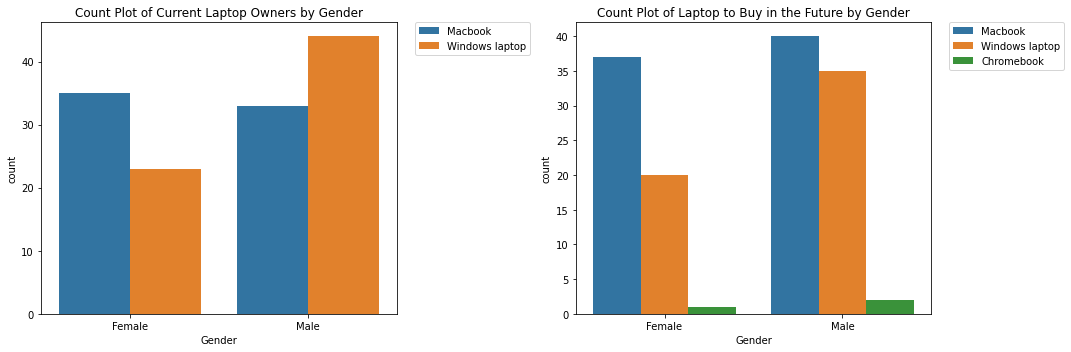

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # setting the plot sizes

# using countplot to create bar charts of current laptop ownership by gender
plt.subplot(1,2,1)
ax = sns.countplot(x    = 'Gender',
                data = survey,
                hue  = 'What laptop do you currently have?')
ax.set_title("Count Plot of Current Laptop Owners by Gender");       # setting plot title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        # moving the legend outside the graph


# using countplot to create bar charts of future laptop ownership by gender
plt.subplot(1,2,2)                                          # setting plot title

ax = sns.countplot(
                x    = 'Gender',
                data = survey,
                hue  = 'What laptop would you buy in next assuming if all laptops cost the same?')
ax.set_title("Count Plot of Laptop to Buy in the Future by Gender");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.tight_layout()

Macs are more popular with female Hultians and their preference grows stronger with future purchases. Males currently own more Windows than Macs, but their attitudes shift for future purchases.

## <font color='steelblue'>Laptop Distribution by Program</font>

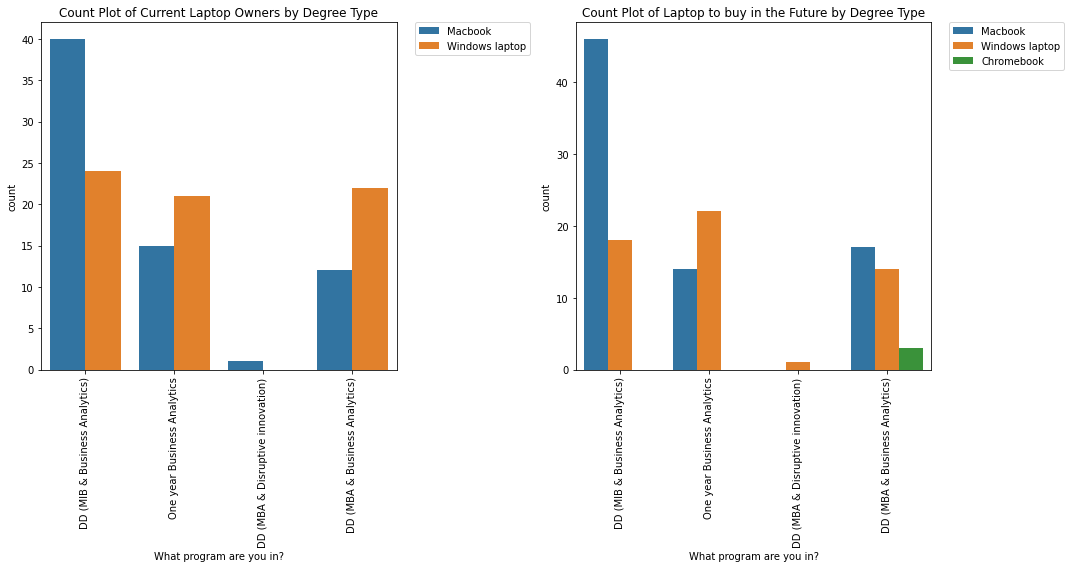

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8)) # Setting the plot sizes 

plt.subplot(1,2,1)
ax = sns.countplot(x    = 'What program are you in?',       # Countplot set up
                data = survey,
                hue  = 'What laptop do you currently have?')
ax.set_title("Count Plot of Current Laptop Owners by Degree Type");  #Setting title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Moving the legend outside the graph
plt.xticks(rotation = 90) # Rotating x labels so they dont overlap

plt.subplot(1,2,2)

ax = sns.countplot(x    = 'What program are you in?',
                data = survey,
                hue  = 'What laptop would you buy in next assuming if all laptops cost the same?')
ax.set_title("Count Plot of Laptop to buy in the Future by Degree Type");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 90)


fig.tight_layout()

Macs are popular with students from the DD(MIB & MsBA) program for both current and future laptops. It is also interesting that One-Year MsBAs have Windows laptops likely due to the nature of their programming jobs.

## <font color='steelblue'>Laptop Distribution by Age</font>

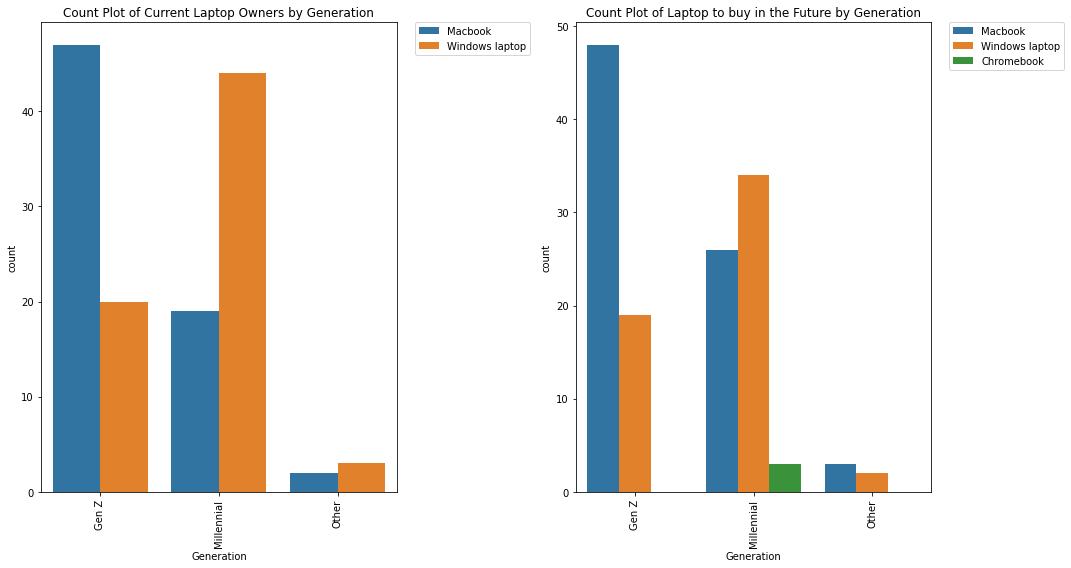

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8)) # Setting the plot sizes 

plt.subplot(1,2,1)
ax = sns.countplot(x   = 'Generation',       # Countplot set up
                data = survey.sort_values(by='Generation'),
                hue  = 'What laptop do you currently have?')
 #Setting title
ax.set_title("Count Plot of Current Laptop Owners by Generation"); 

# Moving the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.xticks(rotation = 90) # Rotating x labels so they dont overlap

plt.subplot(1,2,2)

ax = sns.countplot(
        x    = 'Generation',
        data = survey.sort_values(by='Generation'),
        hue  = 'What laptop would you buy in next assuming if all laptops cost the same?'
                )

ax.set_title("Count Plot of Laptop to buy in the Future by Generation");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 90)


fig.tight_layout()

Windows laptops are a popular choice for current laptop ownership for Millenials but future purchases are inclined towards MacBooks.

## <font color='steelblue'>Laptop Distribution by Region</font>

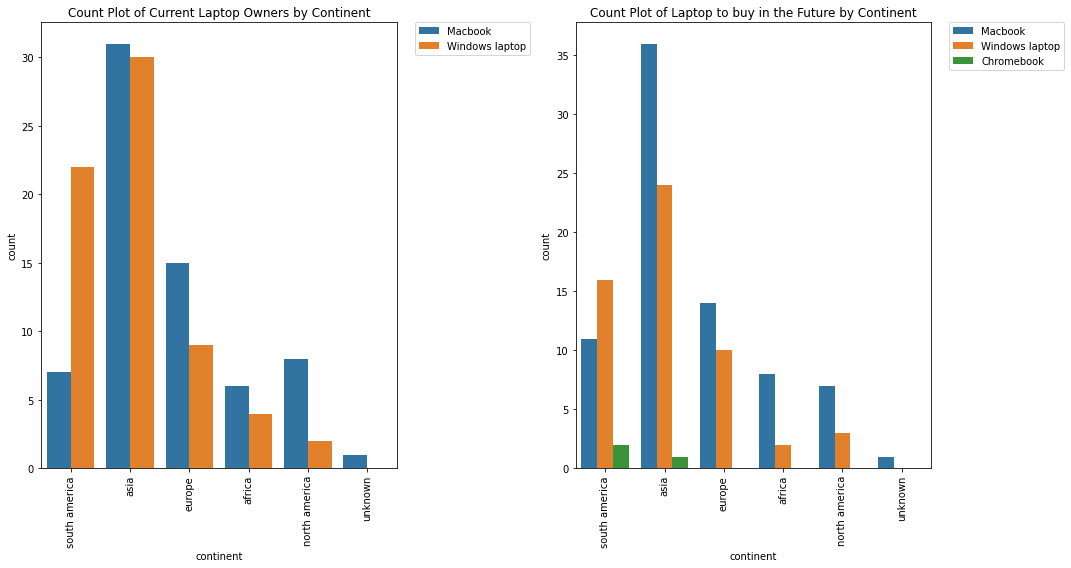

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8)) # Setting the plot sizes 

plt.subplot(1,2,1)
ax = sns.countplot(x   = 'continent',       # Countplot set up
                data = survey,
                hue  = 'What laptop do you currently have?')
ax.set_title("Count Plot of Current Laptop Owners by Continent");  #Setting title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Moving the legend outside the graph
plt.xticks(rotation = 90) # Rotating x labels so they dont overlap

plt.subplot(1,2,2)

ax = sns.countplot(x    = 'continent',
                data = survey,
                hue  = 'What laptop would you buy in next assuming if all laptops cost the same?')
ax.set_title("Count Plot of Laptop to buy in the Future by Continent");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 90)


fig.tight_layout()

MacBooks are the most preferred current and future laptops across most continents.

## <font color='steelblue'>Distribution of Mean Responses</font>

Most of the categories have a relatively normal distribution, and there is no skewness so no need to log transform.

In [23]:
# plotting a distribution of the mean response for each respondent within each  personality category

# commenting out distributuons to avoid data dumping
#auto_distribution(survey.loc[:,'openness_rating':], survey.loc[:,'openness_rating':].columns)

# <font color='navy'>Big-Five</font>

Conducting PCA on the Big-Five features to narrow down key insights between customer behaviour.

## <font color='steelblue'>Principal Component Analysis</font>

In [24]:
# Normalising the variances of the big-five features.

# INSTANTIATING a StandardScaler() object
big_five_scaler = StandardScaler()


# FITTING the scaler with the data
big_five_scaler.fit(big_five_mean_survey)


# TRANSFORMING our data after fit
big_five_X_scaled = big_five_scaler.transform(big_five_mean_survey)


# converting scaled data into a DataFrame
big_five_ratings_scaled = pd.DataFrame(big_five_X_scaled)


# reattaching column names
big_five_ratings_scaled.columns = big_five_mean_survey.columns


In [25]:
# After an in-depth analysis, choosing 3 Features to represent our data

1# INSTANTIATING a PCA object with no limit to principal components
big_five_pca = PCA(n_components = 3,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
big_five_pca_fitted = big_five_pca.fit_transform(big_five_X_scaled)



In [26]:
# component number counter
component_number = 0


# looping over each principal component
for variance in big_five_pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.354
PC 2 : 0.198
PC 3 : 0.183


In [27]:
# Appropriately naming the results of the PCA for analysis

# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(big_five_pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(big_five_ratings_scaled.columns)



# saving to Excel
factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

factor_loadings_df = factor_loadings_df.rename(columns={0: "Vulnerable Narcissists",
                                                        1: "Unreliable Extroverts",
                                                        2: "Attentive Wallflowers"})
factor_loadings_df

<ipython-input-27-5fdfffc39c6c>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df = pd.DataFrame(pd.np.transpose(big_five_pca.components_))


,Vulnerable Narcissists,Unreliable Extroverts,Attentive Wallflowers
openness_rating,-0.498311,0.260117,0.130020
conscientiousness_rating,-0.513301,-0.332001,0.419592
extraversion_rating,-0.375885,0.427306,-0.723443
agreeableness_rating,-0.512122,0.205153,0.250841
neuroticism_rating,0.290946,0.772940,0.469836


**Component Analysis**

- **Vulnerable Narcissists**
This group is high in neuroticism and low in the other four traits, particularly agreeableness. They are moody, reserved and tend to dislike structure and abstract concepts (Cherry, 2020). Vulnerable narcissism is positively associated with neuroticism but negatively correlated with the agreeableness and extraversion characteristics (Zajenkowski, 2019).


- **Unreliable Extroverts**
Members of this group exhibit high neuroticism, high extraversion and low conscientiousness. They are often anxious and easily stressed but outgoing and thrive in social situations. Contrastingly, they are disorganized and dislike structure (Cherry 2020).


- **Attentive Wallflowers**
This group is characterized by low extraversion, high conscientiousness and high neuroticism. People in this group can be emotionally unstable but are quite thoughtful, organized and detail-oriented (Cherry ,2020)

In [28]:
# converting into a DataFrame 
big_five_pca_fitted = pd.DataFrame(big_five_pca_fitted)

# checking results
X_pca_df_big_five = big_five_pca_fitted.copy()

In [29]:
####################
# Fixing variances of the new features to cluster the groups
####################


# INSTANTIATING a StandardScaler() object
pca_big_five_scaler = StandardScaler()


# FITTING the scaler with the data
pca_big_five_scaler.fit(X_pca_df_big_five)


# TRANSFORMING our data after fit
X_scaled_pca_big_five = pca_big_five_scaler.transform(X_pca_df_big_five)


# converting scaled data into a DataFrame
pca_scaled_big_five = pd.DataFrame(X_scaled_pca_big_five)




## <font color='steelblue'>Clustering</font> 

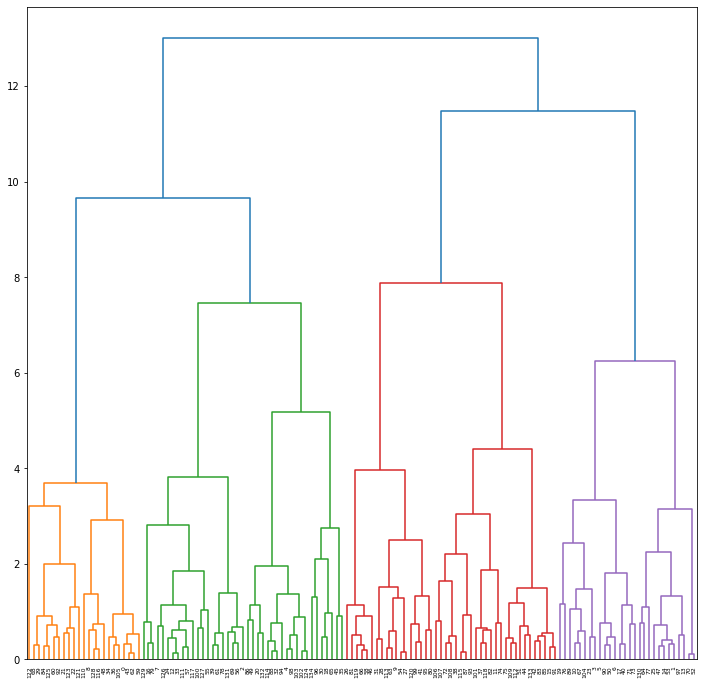

In [30]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled_big_five,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.show()

Dendogram suggests that we should split are data into 5 clusters. After some trial and error and analysing, we settled with 4 clusters

In [31]:
# INSTANTIATING a k-Means object with clusters
big_five_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
big_five_k_pca.fit(pca_scaled_big_five)


# converting the clusters to a DataFrame
big_five_kmeans_pca = pd.DataFrame({'Cluster': big_five_k_pca.labels_})


# checking the results
print(big_five_kmeans_pca.iloc[: , 0].value_counts())

2    44
1    35
0    32
3    24
Name: Cluster, dtype: int64


In [32]:
# storing cluster centers
big_five_centroids_pca = big_five_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
big_five_centroids_pca_df = pd.DataFrame(big_five_centroids_pca)


# renaming principal components
big_five_centroids_pca_df.columns = ['Vulnerable Narcissists', 
                                    'Unreliable Extroverts',      
                                    'Attentive Wallflowers'] 


# checking results (clusters = rows, pc = columns)
big_five_centroids_pca_df.round(2)

,Vulnerable Narcissists,Unreliable Extroverts,Attentive Wallflowers
0,1.04,-0.19,-0.77
1,-0.07,-0.78,0.86
2,-0.93,0.12,-0.65
3,0.42,1.17,0.98


Each cluster is distinct. 

* Cluster 0 favors Vulnerable Narcissists.
* Cluster 1 favors Attentive Wallflowers.
* Cluster 2 favors Unreliable Extroverts but not by much - Most participants
* Cluster 3 favors a blend of all three types of personalities - Fewest Participants

In [33]:
clst_pca_df = pd.concat([big_five_kmeans_pca,
                         X_pca_df_big_five],
                         axis = 1)

# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[ : , ['What laptop do you currently have?', 'What laptop would you buy in next assuming if all laptops cost the same?']],
                                clst_pca_df],
                                axis = 1)

In [34]:
# Making a final dataframe for boxplot visualisations

final_pca_clust_df = final_pca_clust_df.rename(columns= {0:'Vulnerable Narcissists',
                                                         1:'Unreliable Extroverts',
                                                         2:'Attentive Wallflowers'})


## <font color='steelblue'>Big Five Boxplot Visualisations</font>  

In [35]:
# removing chromebook observations. Not enough data to analyse
final_pca_clust_df = final_pca_clust_df[final_pca_clust_df["What laptop would you buy in next assuming if all laptops cost the same?"]!= "Chromebook"]

<AxesSubplot:xlabel='What laptop would you buy in next assuming if all laptops cost the same?', ylabel='Vulnerable Narcissists'>

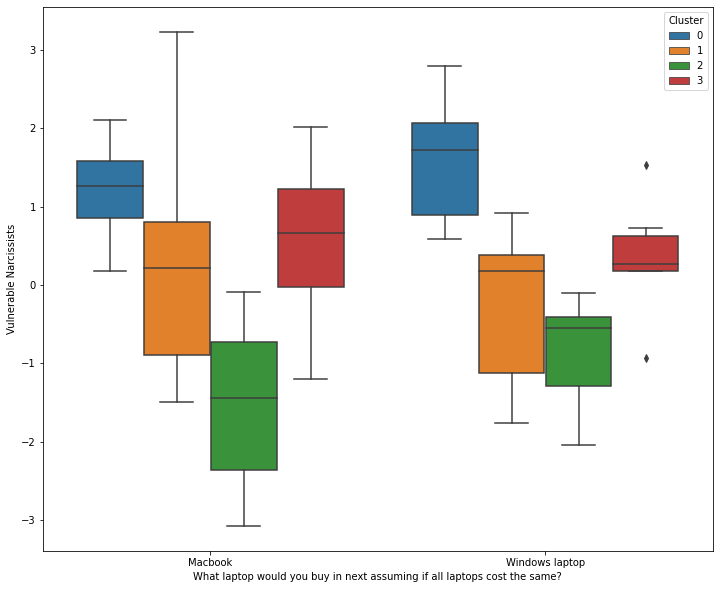

In [36]:
########################
# Future Laptop Vulnerable Narcissists
########################


fig, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = "Vulnerable Narcissists",
            hue = 'Cluster',
            data = final_pca_clust_df)




As we see in the plot above, the two blue plots(cluster 0) are slightly separated, this shows that people with Windows Laptops score higher in the Vulnerable Narcissists category. They prefer being alone. They tend to be avid gamers therefore the dedicated GPUs are more important to them than the user experience. 


<AxesSubplot:xlabel='What laptop do you currently have?', ylabel='Unreliable Extroverts'>

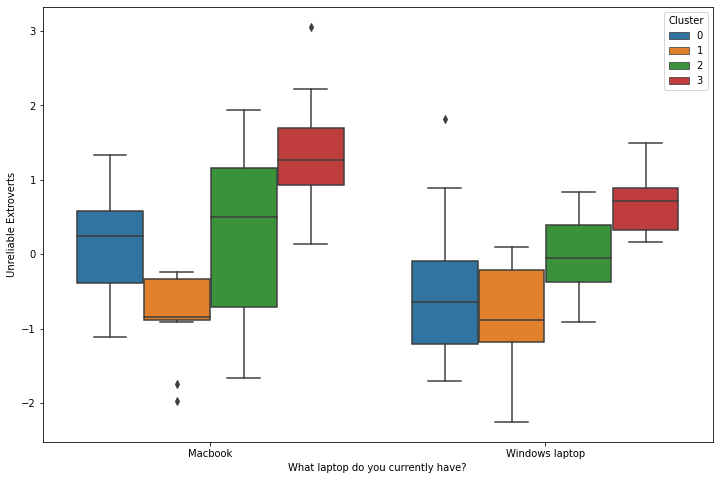

In [37]:
########################
# Current Laptop Unreliable Extroverts
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = "Unreliable Extroverts",
            hue = 'Cluster',
            data = final_pca_clust_df)



Unreliable Extroverts tend to choose a MacBook. Macs are easy to use and user friendly, and these people are usually unorganized and get easily stressed, so it is preferable for them to choose a Mac. MacBooks are the most widely used operating system when working in the design industry (Sorrentino, 2021).

<AxesSubplot:xlabel='What laptop would you buy in next assuming if all laptops cost the same?', ylabel='Unreliable Extroverts'>

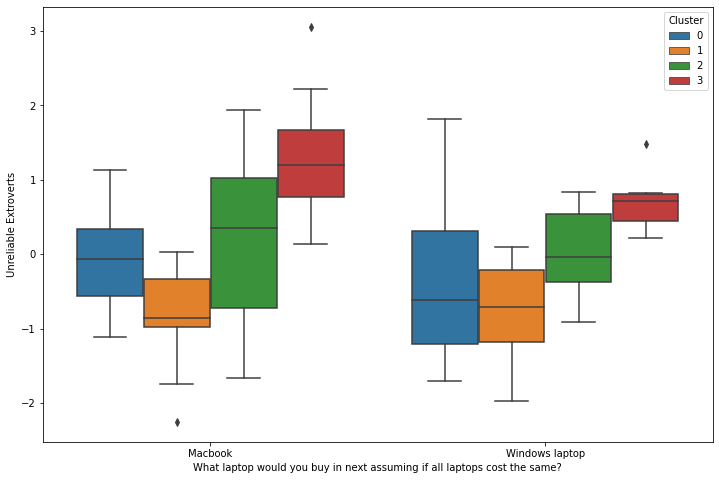

In [38]:
########################
# Future Laptop Vulnerable Narcissists
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = "Unreliable Extroverts",
            hue = 'Cluster',
            data = final_pca_clust_df)

Fewer people shifted to using more MacBooks than Windows as it is likely preferable in their industries. MacBooks also come with added features like easy connectivity between devices to share screens and share ideas. As this type of people are mostly creative, they would prefer having easy connectivity communicate their ideas with colleagues.

<AxesSubplot:xlabel='What laptop do you currently have?', ylabel='Attentive Wallflowers'>

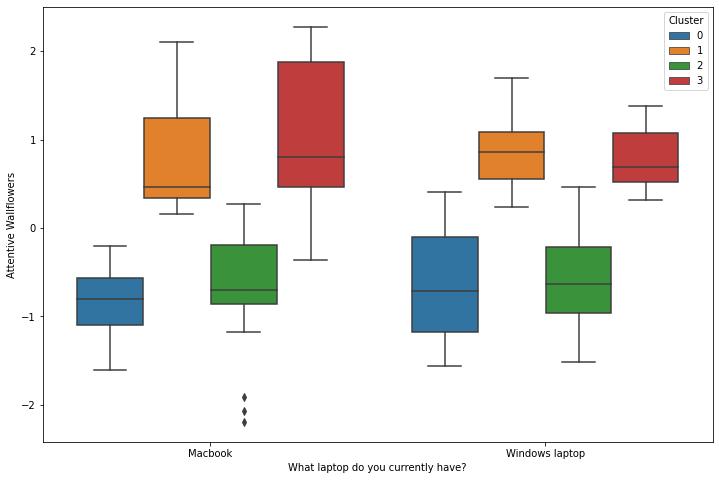

In [39]:
######################## Idinma #######################

########################
# Current Laptop Attentive Wallflowers
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = "Attentive Wallflowers",
            hue = 'Cluster',
            data = final_pca_clust_df)



Windows Users in cluster 1 are likely to be Attentive Wallflowers. We understand that people this group tend to be more reserved and introverted. They are also often anxious and stressed. However, what they lack in social skills, they make up for with their thoughtfulness and keen eye for detail (Cherry 2020).

As introverts, people in this group tend to enjoy intimate and meaningful conversations. They likely enjoy solo activities like listening to music and playing video games. Since they don't enjoy crowded places, they prefer the convenience of online shopping over an in-store experience (Cashman 2021).

<AxesSubplot:xlabel='What laptop would you buy in next assuming if all laptops cost the same?', ylabel='Attentive Wallflowers'>

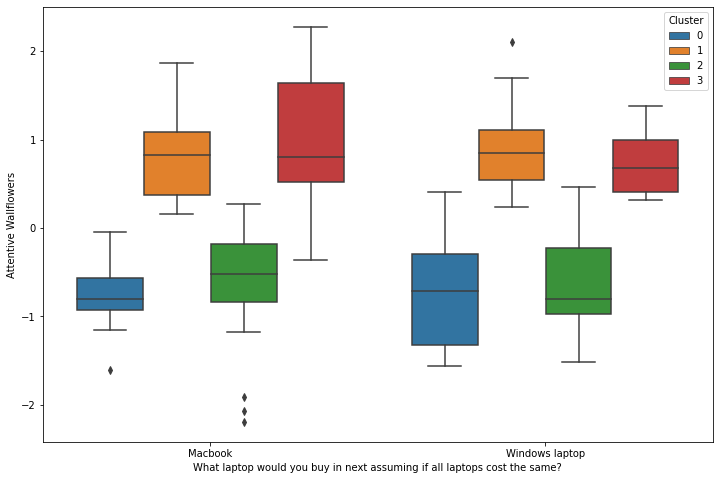

In [40]:
########################
# Future Laptop Attentive Wallflowers
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = "Attentive Wallflowers",
            hue = 'Cluster',
            data = final_pca_clust_df)




Macbook and Windows users are close for Attentive Wallflowers. So, even though the previous plot suggested that Attentive Wallflowers might prefer a Windows laptop over a Macbook, there is no clear preference for laptop they would buy in the future, which presents an opportunity.

# <font color='navy'>Hult DNA</font>

*Disclaimer: After analyzing the features, namely "thinking_rating", "communicating_rating" and "team_building_rating", it seems that these are strongly interlinked; not necessarily correlated. It isn't outrightly visible what it is these rating are quantifying and how they explain the individuals’ personality. This is a conundrum in addition to the fact that the answers are based on the participants' own perception of themselves.*

## <font color='steelblue'>Principal Component Analysis</font>

In [41]:
# INSTANTIATING a StandardScaler() object
hult_scaler = StandardScaler()


# FITTING the scaler with the data
hult_scaler.fit(hult_dna_mean_survey)


# TRANSFORMING our data after fit
hult_X_scaled = hult_scaler.transform(hult_dna_mean_survey)


# converting scaled data into a DataFrame
hult_ratings_scaled = pd.DataFrame(hult_X_scaled)


# reattaching column names
hult_ratings_scaled.columns = hult_dna_mean_survey.columns

In [42]:
# INSTANTIATING a PCA object with no limit to principal components
hult_pca = PCA(n_components = 2,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
hult_pca_fitted = hult_pca.fit_transform(hult_X_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", hult_X_scaled.shape)
print("PCA shape     :", hult_pca_fitted.shape)

Original shape: (135, 3)
PCA shape     : (135, 2)


In [43]:
# transposing pca components
hult_factor_loadings_df = pd.DataFrame(pd.np.transpose(hult_pca.components_))


# naming rows as original features
hult_factor_loadings_df = hult_factor_loadings_df.set_index(hult_ratings_scaled.columns)



# saving to Excel
hult_factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

hult_factor_loadings_df = hult_factor_loadings_df.rename(
                                            columns = {0:"Incomplete Leaders",
                                                       1:"Square Team-Players"}
                                                        )
hult_factor_loadings_df

<ipython-input-43-abed7f631cd2>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  hult_factor_loadings_df = pd.DataFrame(pd.np.transpose(hult_pca.components_))


,Incomplete Leaders,Square Team-Players
thinking_rating,-0.554939,-0.806978
communicating_rating,-0.596812,0.216988
team_building_rating,-0.579533,0.549274


**Component Analysis**

- **Incomplete Leaders**
People in this group are below the mean in all three Hult DNA components. The Hult DNA was designed with leadership skills in mind. Therefore, these results reveal that they are lacking in core leadership skills like lack self-awareness and communication. As Hult students, one can expect that they will learn these skills by the end of their degree program.

- **Square Team-Players**
This group has low thinking skills, but high team-building and communication skills. Members of this group are not very self-aware or dynamic in their thinking. However, they are able to foster good relationships and communicate effectively with their peers.

In [44]:
# converting into a DataFrame 
hult_pca_fitted = pd.DataFrame(hult_pca_fitted)

# checking results
X_pca_df_hult = hult_pca_fitted.copy()

In [45]:
####################
# Fixing variances for Hult PCAs
####################


# INSTANTIATING a StandardScaler() object
pca_hult_scaler = StandardScaler()


# FITTING the scaler with the data
pca_hult_scaler.fit(X_pca_df_hult)


# TRANSFORMING our data after fit
X_scaled_pca_hult = pca_hult_scaler.transform(X_pca_df_hult)


# converting scaled data into a DataFrame
pca_scaled_hult = pd.DataFrame(X_scaled_pca_hult)

## <font color='steelblue'>Clustering</font>

In [46]:
# Dendogram suggested to make 2 clusters. Upon analysis we decided to retain
# 3 clusters instead

# INSTANTIATING a k-Means object with clusters
hult_k_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
hult_k_pca.fit(pca_scaled_hult)


# converting the clusters to a DataFrame
hult_kmeans_pca = pd.DataFrame({'Cluster': hult_k_pca.labels_})


# checking the results
print(hult_kmeans_pca.iloc[: , 0].value_counts())

0    52
1    44
2    39
Name: Cluster, dtype: int64


In [47]:
# storing cluster centers
hult_centroids_pca = hult_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
hult_centroids_pca_df = pd.DataFrame(hult_centroids_pca)


# renaming principal components
hult_centroids_pca_df.columns = ['Incomplete Leaders', 
                                 'Square Team-Players'] 


# checking results (clusters = rows, pc = columns)
hult_centroids_pca_df.round(2)

,Incomplete Leaders,Square Team-Players
0,-0.9,0.11
1,0.8,0.83
2,0.3,-1.08


In [48]:
hult_clst_pca_df = pd.concat([hult_kmeans_pca,
                         X_pca_df_hult],
                         axis = 1)

# concatenating demographic information with pca-clusters
hult_final_pca_clust_df = pd.concat([survey.loc[ : , ['What laptop do you currently have?',
                                                      'What laptop would you buy in next assuming if all laptops cost the same?',
                                                      'thinking_rating',
                                                      'communicating_rating',
                                                      'team_building_rating'
                                                      ]],
                                hult_clst_pca_df],
                                axis = 1)
hult_final_pca_clust_df = hult_final_pca_clust_df.rename(columns = 
                                                    {0:"Incomplete Leaders",
                                                     1:'Square Team-Players'})

# Removing chromebooks due to lack of observations
hult_final_pca_clust_df = hult_final_pca_clust_df[hult_final_pca_clust_df['What laptop would you buy in next assuming if all laptops cost the same?'] != "Chromebook"]

## <font color='steelblue'>Hult DNA Boxplot Visualisations</font> 

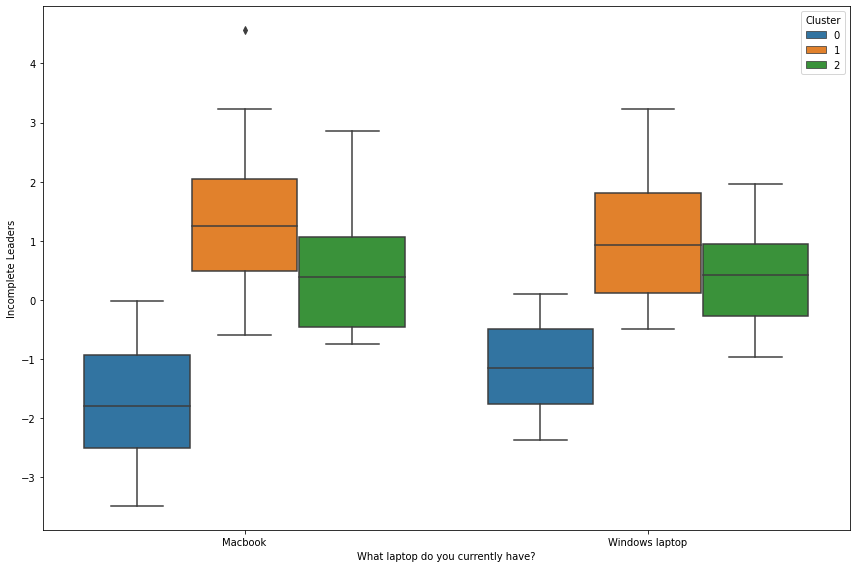

In [49]:
########################
# Current Laptop Incomplete Leaders
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Incomplete Leaders',
            hue = 'Cluster',
            data = hult_final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

Students in Cluster 0 are good leaders in terms of Hult DNA. There is some separation in people from this cluster. This reflects that the people who have a tendency to be worse leaders tend to have Macbooks. Windows users and their lower 75 percentile spread is also touching the low standard deviations of -3.

It is a potent assumption that these people are more organized, self-aware and demonstrate strong leadership skills; assuming that these people are goal-oriented and strive for excellence, their choice in current laptop is therefore well researched and measured. Price might be a factor here. But observing the boxplot below, and analyzing their future purchases given that price isn't a factor, they still have a small tendency towards Windows laptops. It seems Macbooks lack the features required to sway these people.

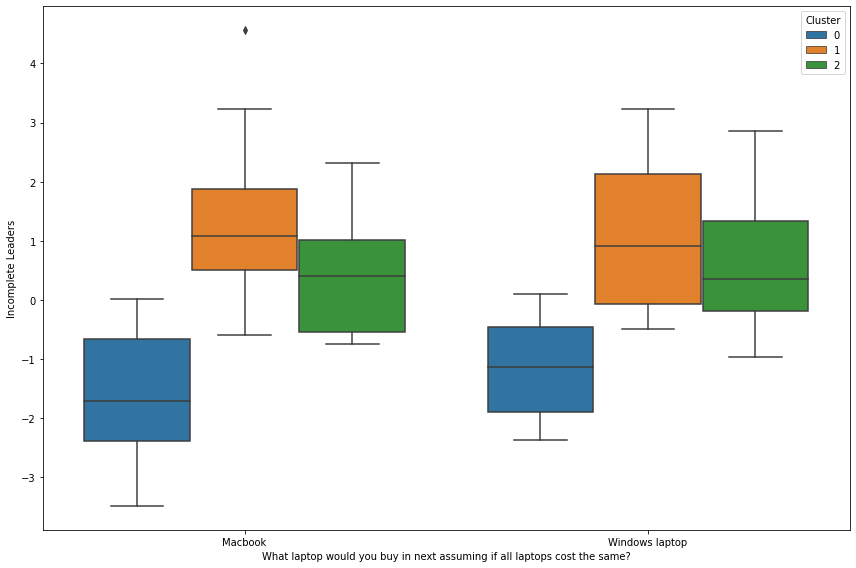

In [50]:
########################
# Future Laptop Incomplete Leaders
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Incomplete Leaders',
            hue = 'Cluster',
            data = hult_final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# <font color='navy'>Insights and Conclusion</font>

Coming to the end of our analysis, we have put together some key insights for Apple based on a combination of findings from our analysis and external research. 




## **Insight One**
To target **Vulnerable Narcissists**', Apple needs to launch a gaming laptop with a higher processor and CPU that is also cost-friendly. If the costs of doing this are not feasible, an alternative is "gaming on the cloud." Here, Apple needs to provide remote subscription-based servers that would allow users to play video games from their computers using only a controller and an internet connection. The processing power and speed would fall not to the user's MacBook, but to Apple remotely.


## **Insight Two**
Given that some people in the **Attentive Wallflower** group are likely to purchase a Macbook as their next laptop, there is a good opportunity to market to them. First, Apple needs to hold a focus group for Windows users who identify as introverts (as they would fall into this category). The purpose of this focus group would be to reveal what would make them switch to a MacBook. Finally, introverts tend to prefer reading to talking, and respond well to data, so another way to attract them to ensure that in-store and online items are labeled clearly and sufficiently with extra details. (Schlesinger, 2020). 

## **Insight Three**
Since **Unreliable Extroverts** are creative, kind and jolly individuals plagued by irresponsible traits such as disorganization, they are already inside the Apple market share. Apple should double down on this segment of customers to capitalize on the ones on the fence about a laptop decision. The best way is to advertise the Macbooks amplifying the ability of the Apple products’ interconnectedness to alleviate their organization issues.


## **Insight Four**
Our visualization in Section 3 shows that more than twice as many millennials own Windows than MacBooks. However, in terms of the laptops that this group will purchase in the future, there is a smaller gap between those who say they will purchase Windows over a MacBook. Research shows that Facebook is a millennial's favorite website, so Apple should invest in targeted Facebook promotions to market to this demographic (Marketing to, 2021).




Overall, we have seen interesting trends between personality traits and laptop ownership. For Vulnerable Narcissists and Attentive Wallflowers, Apple should take the above steps to penetrate Windows market share and break the hold they have on these personality types. Apple should double down on Unreliable Extroverts with customer-retention strategies since they are already Mac lovers.


# <font color='navy'>Citations</font>

Awesomers.com. 2021. Marketing to Millennials - Top 9 Things to Know to Sell. [online] Available at: <https://www.awesomers.com/marketing-to-millennials> [Accessed 22 February 2021].


Cashman, J., 2021. 10 Best Activities To Do With Introverts. [online] Lifehack. Available at: <https://www.lifehack.org/articles/communication/10-best-activities-with-introverts.html> [Accessed 22 February 2021].


Cherry, K., 2020. What Are the Big 5 Personality Traits?. [online] Verywell Mind. Available at: <https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#agreeableness> [Accessed 19 February 2021].


Lim, A., 2021. The Big Five Personality Traits. [online] Simplypsychology.org. Available at: <https://www.simplypsychology.org/big-five-personality.html> [Accessed 20 February 2021].


Look, M., 2021. What Are the Big 5? | Payoff Life. [online] Payoff Life. Available at: <https://www.payoff.com/life/science/what-are-the-big-5/> [Accessed 21 February 2021].


Schlesinger, T., 2020. How to sell to an introvert. [online] Medium. Available at: <https://tessaschlesinger.medium.com/how-to-sell-to-an-introvert-acebb2c69058> [Accessed 22 February 2021].


Shaheem, S., 2019. Why every leader needs a growth mindset. [Blog] Hult Blogs, Available at: <https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/> [Accessed 19 February 2021].


Sorrentino, J., 2021. Why 99.9% Of Graphic Designers Choose Mac VS PC. [online] Wellfedpodcast.com. Available at: <https://www.wellfedpodcast.com/article/why-graphic-designers-use-mac> [Accessed 22 February 2021].


Trimidal, C., 2021. Mac vs. PC: Which Is Better for Gaming?. [online] Tech Loot. Available at: <https://techloot.co.uk/mac-vs-pc-gaming/> [Accessed 22 February 2021].


Zajenkowski, M. and Szymaniak, K., 2019. Narcissism between facets and domains. The relationships between two types of narcissism and aspects of the Big Five. Current Psychology, [online] Available at: <https://link.springer.com/article/10.1007/s12144-019-0147-1> [Accessed 20 February 2021].


